In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df_data = pd.read_csv('train.csv')

# Exploratory Data Analysis

In [4]:
df_data.shape

(10886, 12)

In [5]:
df_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## Basic feature engineering

### Removal of outliers

/Users/Tim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


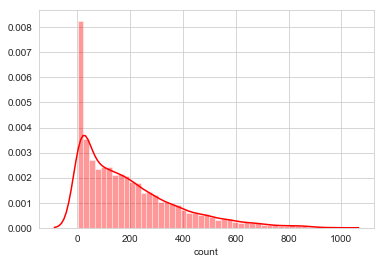

In [8]:
sns.distplot(df_data['count'],color='red');

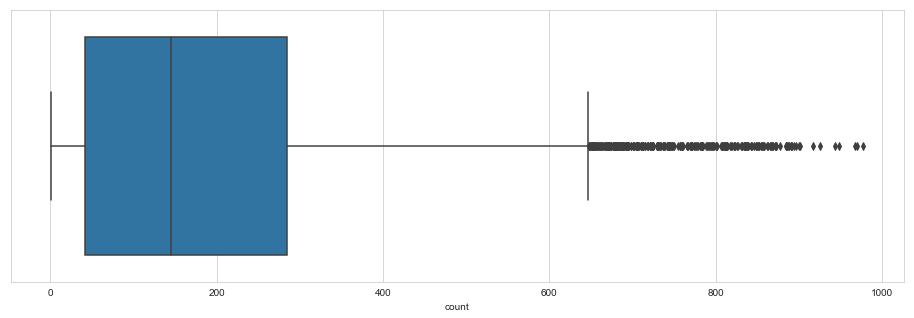

In [9]:
plt.figure(figsize=(16,5));
sns.boxplot(df_data['count']);

In [10]:
df_data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

We remove the points identified as outliers by the boxplot, ie the points which fall outside the interval $[Q_1-1.5\times IQR,Q_3+1.5\times IQR]$, where $Q_1$ and $Q_3$ are the first and third quartiles of the distribution and $IQR=Q_3-Q_1$ is the interquartile range.

In [11]:
Q1 = 42
Q3 = 284
IQR = Q3 -Q1
df_data = df_data.loc[(df_data['count']<=Q3+1.5*IQR)&(df_data['count']>=Q1-1.5*IQR)]

In [12]:
#df_data.loc[np.abs(df_data['count']-df_data['count'].mean())<=3*df_data['count'].std()].shape

In [13]:
df_data.shape

(10586, 12)

### Dealing with dates and seasons

In [14]:
df_data['datetime']=pd.to_datetime(df_data["datetime"])
df_data['year']=df_data['datetime'].apply(lambda d : d.year)
df_data['hour']=df_data['datetime'].apply(lambda d : d.hour)
df_data['day']=df_data['datetime'].apply(lambda d : d.day_name())
df_data['month']=df_data['datetime'].apply(lambda d : d.month_name())

In [15]:
dico_seasons = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
df_data['season']=df_data['season'].apply(lambda s : dico_seasons[s])

In [16]:
df_data.set_index('datetime', inplace=True)

In [17]:
df_data['weekend']=df_data['day'].isin(['Saturday','Sunday'])*1

In [18]:
df_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,day,month,weekend
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,Saturday,January,1
2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,January,1
2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,Saturday,January,1
2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,Saturday,January,1
2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,Saturday,January,1


## Data Vizualization

#### Average count by hour over the whole data set

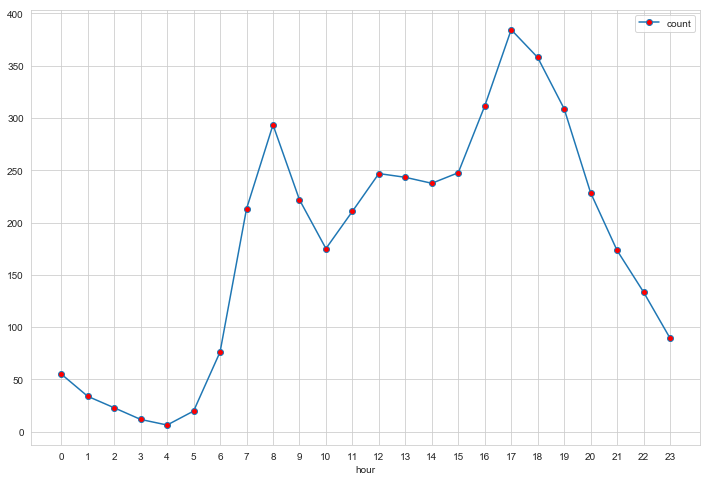

In [19]:
df_data[['hour','count']].groupby(by=['hour']).mean().\
plot(marker = 'o',markerfacecolor='red',figsize=(12,8),xticks=np.arange(0,24));

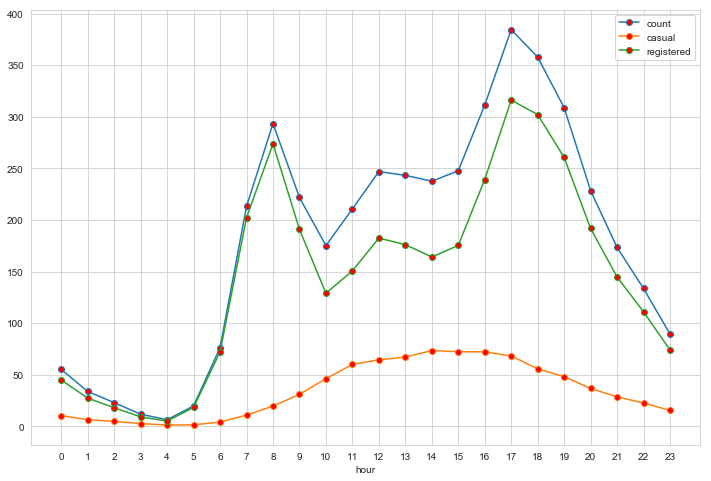

In [20]:
df_data[['hour','count','casual','registered']].groupby(by=['hour']).mean().\
plot(marker = 'o',markerfacecolor='red',figsize=(12,8),xticks=np.arange(0,24));

#### Holidays

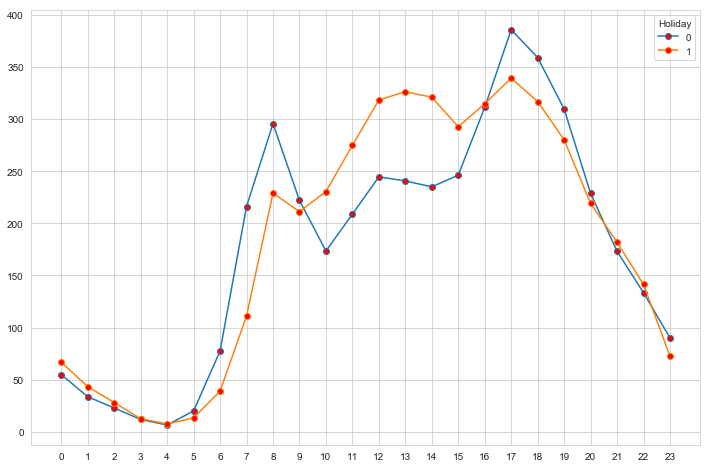

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df_data.loc[df_data['holiday']==0,['hour','count']].groupby(by=['hour']).mean(),\
         marker = 'o',markerfacecolor='red', label=0);
plt.plot(df_data.loc[df_data['holiday']==1,['hour','count']].groupby(by=['hour']).mean(),\
         marker = 'o',markerfacecolor='red', label=1);
plt.xticks(np.arange(0,24))
plt.legend(title='Holiday');

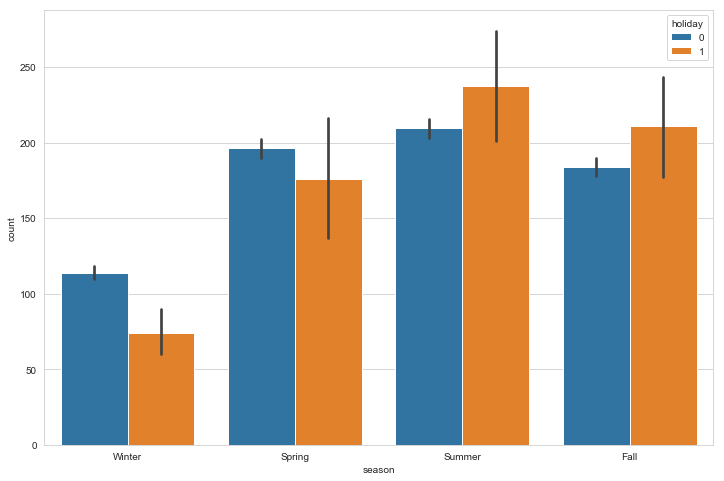

In [22]:
plt.figure(figsize=(12,8));
sns.barplot(x='season',y='count',hue='holiday', data=df_data);

#### Influence of the seasons/months

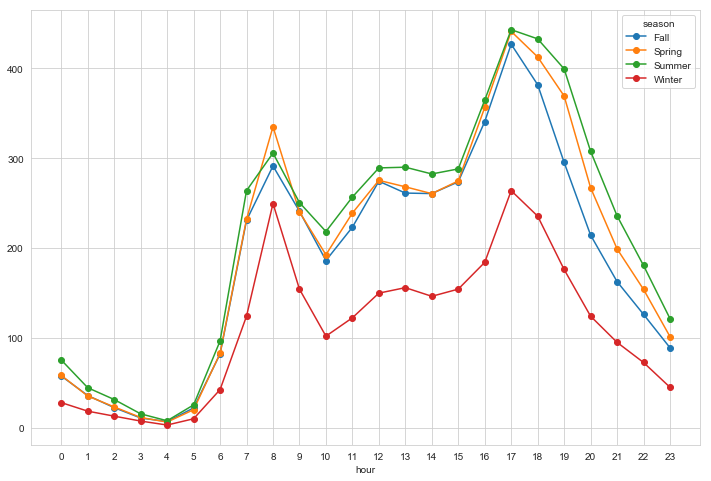

In [23]:
df_data[['hour','season','count']].\
groupby(by=['season','hour']).mean().pivot_table(index='hour',columns='season',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

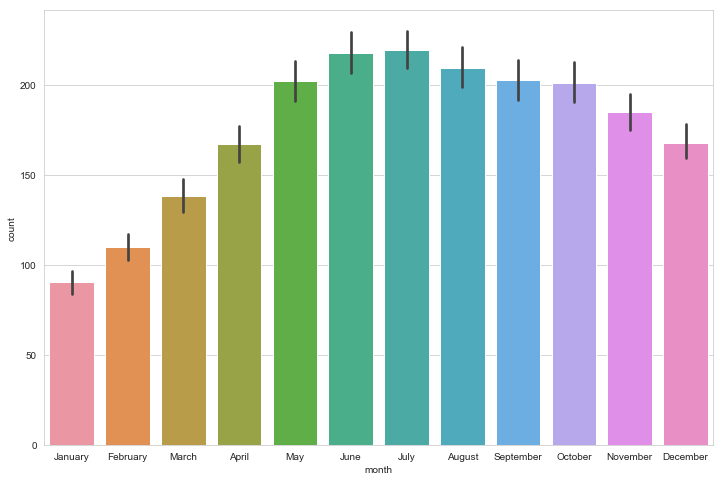

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='count',data=df_data);

#### Weekdays VS Weekend

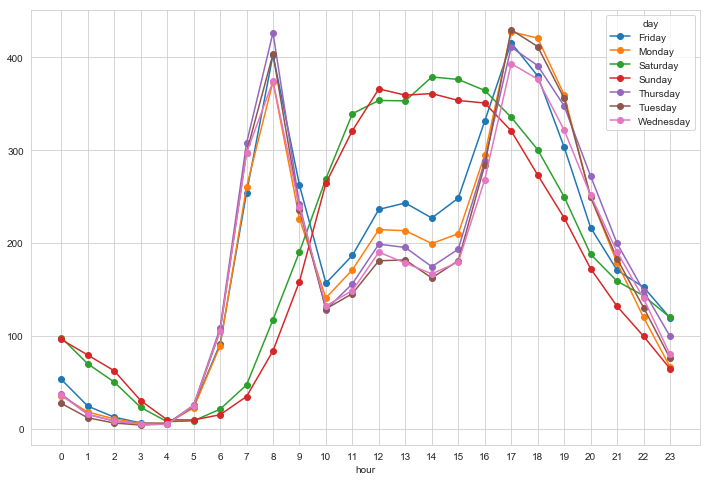

In [25]:
df_data[['hour','day','count']].\
groupby(by=['day','hour']).mean().pivot_table(index='hour',columns='day',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

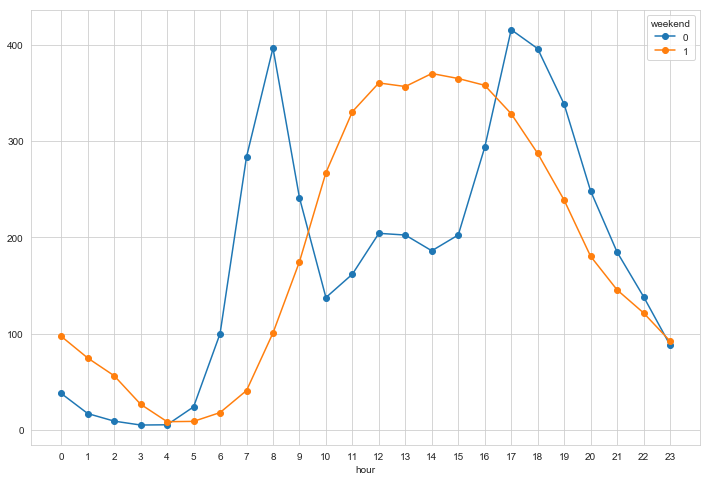

In [26]:
df_data[['hour','weekend','count']].\
groupby(by=['weekend','hour']).mean().pivot_table(index='hour',columns='weekend',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

#### Influence of the weather

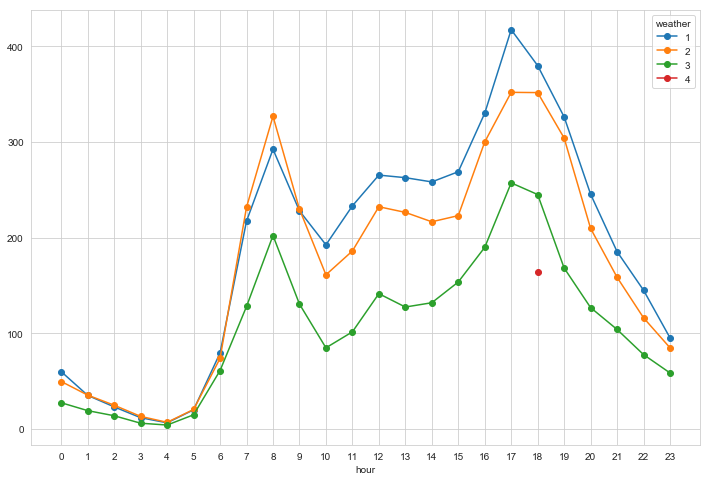

In [27]:
df_data[['hour','weather','count']].\
groupby(by=['weather','hour']).mean().pivot_table(index='hour',columns='weather',values='count').\
plot(marker = 'o', figsize=(12,8),xticks=np.arange(0,24));

## Distribution analysis

#### Distributions of the continuous variables

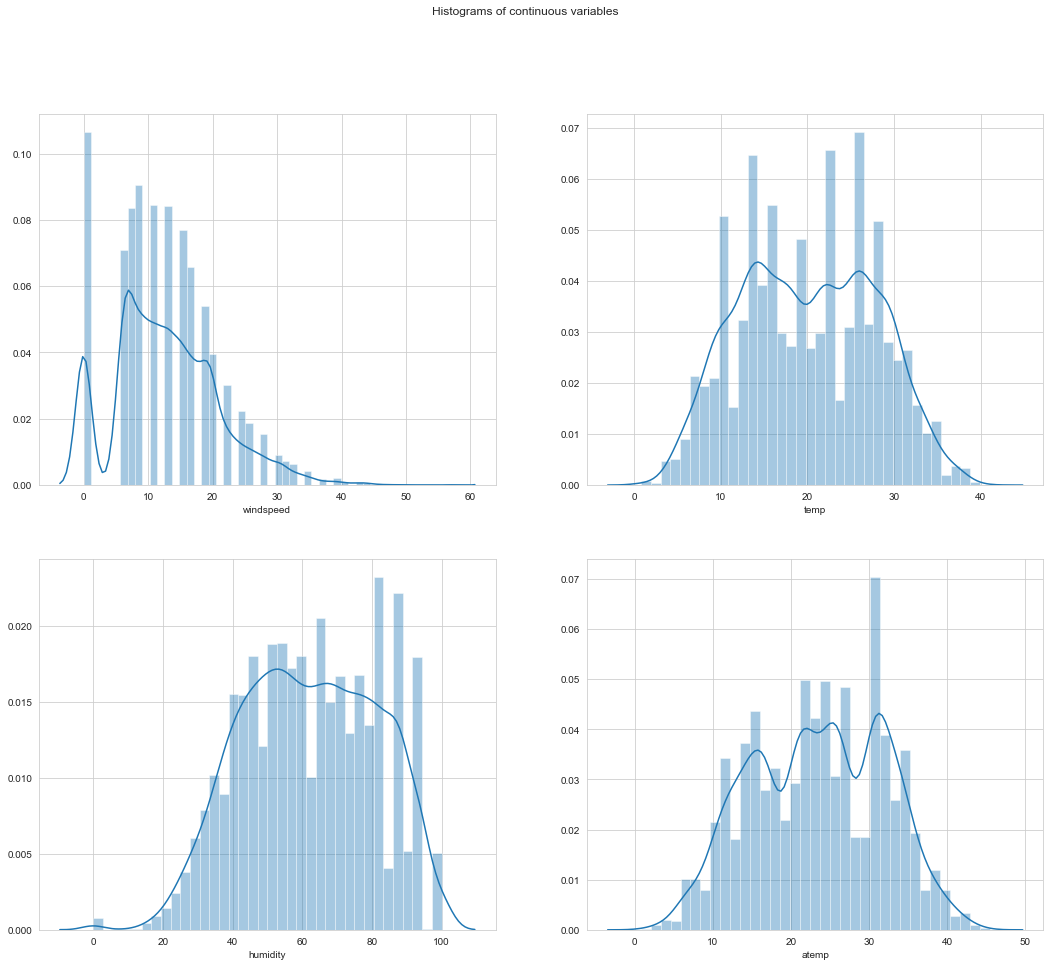

In [28]:
fig, axes = plt.subplots(2,2, figsize=(18,15))
sns.distplot(df_data['windspeed'], ax=axes[0,0])
sns.distplot(df_data['temp'], ax=axes[0,1])
sns.distplot(df_data['atemp'], ax=axes[1,1])
sns.distplot(df_data['humidity'], ax=axes[1,0])
plt.suptitle('Histograms of continuous variables');

#### Correlation analysis

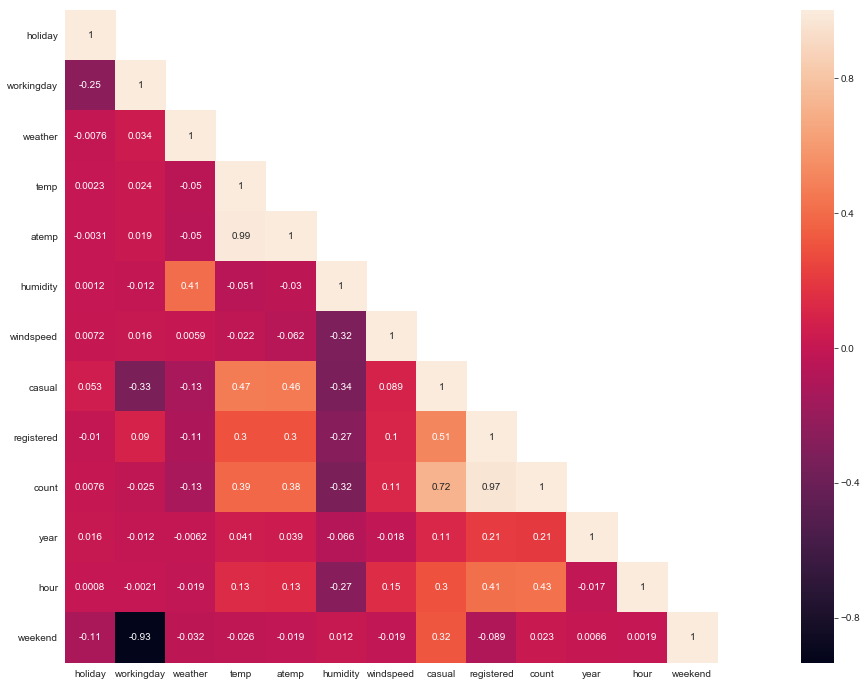

In [29]:
cor_mat= df_data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True);

# Forecasting the demand with learning algorithms

### Data preprocessing

In [30]:
columns_to_drop = ['weekend','casual','registered','month','day','year']

In [31]:
df_data_forecast = df_data.drop(columns_to_drop, axis=1)

In [32]:
df_data_forecast.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
datetime,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,1,9.84,14.395,81,0.0,16,0
2011-01-01 01:00:00,Winter,0,0,1,9.02,13.635,80,0.0,40,1
2011-01-01 02:00:00,Winter,0,0,1,9.02,13.635,80,0.0,32,2
2011-01-01 03:00:00,Winter,0,0,1,9.84,14.395,75,0.0,13,3
2011-01-01 04:00:00,Winter,0,0,1,9.84,14.395,75,0.0,1,4


In [33]:
#df_data_forecast[['hour','weather','season']]=df_data[['hour','weather','season']].astype('category')
df_data_forecast[['weather','season']]=df_data[['weather','season']].astype('category')

In [34]:
df_data_forecast=pd.get_dummies(df_data_forecast)

In [35]:
df_data_forecast.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

### Train/Test split

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
X = df_data_forecast.drop('count', axis=1)
y = df_data_forecast['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Root Mean Squared Logarithmic Error (RMSLE)

In [38]:
from sklearn.metrics import mean_squared_log_error as msle

The RMSLE scorer used for the evaluation of the prediction in this Kaggle competition, is defined as such : 

$$RMSLE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (\log (1+\hat{y}_i)-\log (1+y_i))^2}$$

where $n$ is the number of points in the dataset and $\hat{y}_i$ and $y_i$ are respectively the predicted and actual counts.

In [39]:
def RMSLE(y,y_hat):
    return np.sqrt(msle(y,y_hat))

## Training the data on several models

We first try to fit naively different models, without trying to optimize their input parameters, to see which one seems best adapted to our problem.

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [41]:
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor(), 
          RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]

model_names = ['Linear Regression', 'KNN', 'Neural Network', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
RMSLE_scores = []

for model in models:
    
    model.fit(X_train, np.log1p(y_train))
    y_hat = np.exp(model.predict(X_test))-1
    
    RMSLE_scores.append(RMSLE(y_test, y_hat))

/Users/Tim/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/Tim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
pd.DataFrame({'Model': model_names, 'RMSLE': RMSLE_scores}).sort_values(by= 'RMSLE').set_index('Model')

,RMSLE
Model,
Random Forest,0.428694
Gradient Boosting,0.437424
Neural Network,0.568572
AdaBoost,0.658931
KNN,0.760782
Linear Regression,1.002103


### Random Forest Regressor

In [43]:
rf_reg = RandomForestRegressor(random_state=42)

rf_reg.fit(X_train, np.log1p(y_train))
y_hat = np.exp(rf_reg.predict(X_test))-1

print("RMSLE with Random Forest Regression : ", RMSLE(y_test,y_hat))

/Users/Tim/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSLE with Random Forest Regression :  0.42317905366531955


### Testing the model on the test data set and exporting submission file

In [84]:
%load_ext autoreload
%autoreload 1

In [90]:
%aimport data_preprocessing

In [140]:
df_test = data_preprocessing.process(pd.read_csv('test.csv'))

In [141]:
rf_reg.fit(X, np.log1p(y))
y_hat = np.exp(rf_reg.predict(df_test))-1

In [142]:
submission = pd.DataFrame(data={'datetime':df_test.index, 'count': y_hat})

In [143]:
submission.to_csv('random_forest_submission.csv', index= False)